In [32]:
# import needed libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

In [33]:
# load dataset
df = pd.read_csv("hungarian_heart_diseases.csv")

# remove observations with missings
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,age,sex,chest_pain,trestbps,fasting_blood_sugar,restecg,thalach,exercise_induce_angina,oldpeak,outcome
0,28,1,2,130,0,2,185,0,0.0,0
1,29,1,2,120,0,0,160,0,0.0,0
2,29,1,2,140,0,0,170,0,0.0,0
3,30,0,1,170,0,1,170,0,0.0,0
4,31,0,2,100,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
279,52,1,4,160,0,0,94,1,2.5,1
280,54,0,3,130,0,1,100,1,0.0,1
281,56,1,4,155,1,0,150,1,3.0,1
282,58,0,2,180,0,0,110,1,1.0,1


In [34]:
# check for missing values
df.isnull().sum()

age                       0
sex                       0
chest_pain                0
trestbps                  0
fasting_blood_sugar       0
restecg                   0
thalach                   0
exercise_induce_angina    0
oldpeak                   0
outcome                   0
dtype: int64

In [35]:
df.describe()

,age,sex,chest_pain,trestbps,fasting_blood_sugar,restecg,thalach,exercise_induce_angina,oldpeak,outcome
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,47.820423,0.732394,2.992958,132.725352,0.070423,0.214789,139.193662,0.306338,0.589085,0.362676
std,7.860947,0.443492,0.962157,17.761731,0.256309,0.460058,23.841226,0.461786,0.915775,0.481621
min,28.000000,0.000000,1.000000,92.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


<Axes: xlabel='outcome', ylabel='count'>

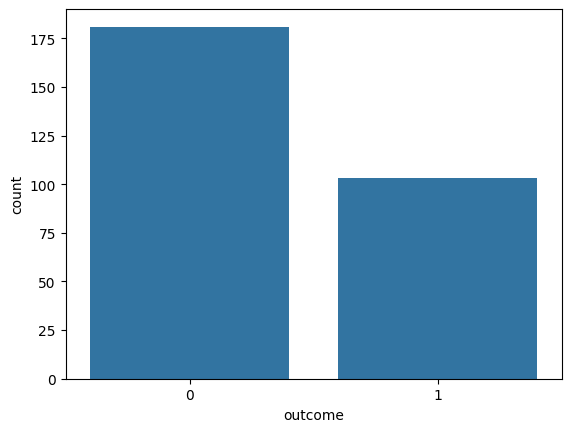

In [36]:
# visualize target variable distribution
sns.countplot(x="outcome", data=df)

<Axes: xlabel='age', ylabel='Count'>

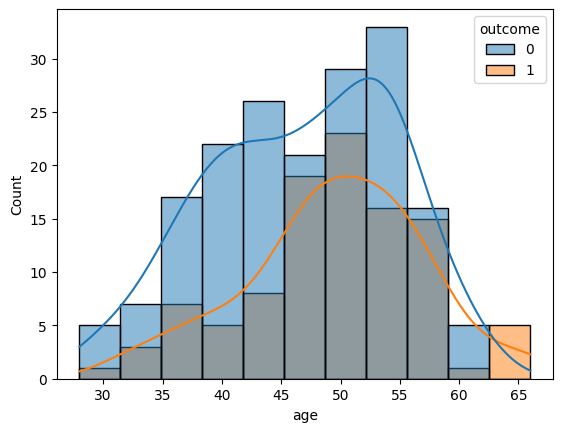

In [37]:
# visualize age distribution by outcome
sns.histplot(data=df, x="age", hue="outcome", kde=True)

<Axes: xlabel='outcome', ylabel='trestbps'>

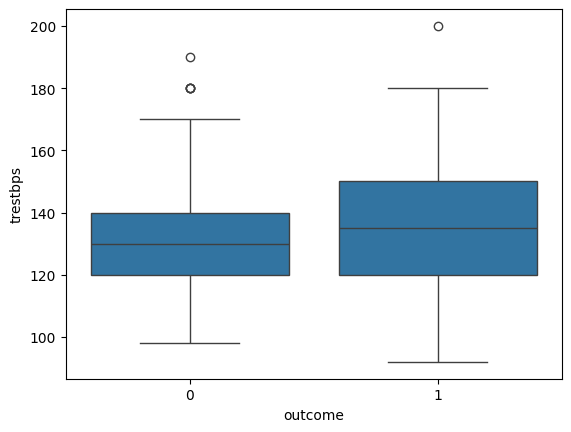

In [38]:
# visualize trestbps distribution by outcome
sns.boxplot(x="outcome", y="trestbps", data=df)

<Axes: xlabel='chest_pain', ylabel='count'>

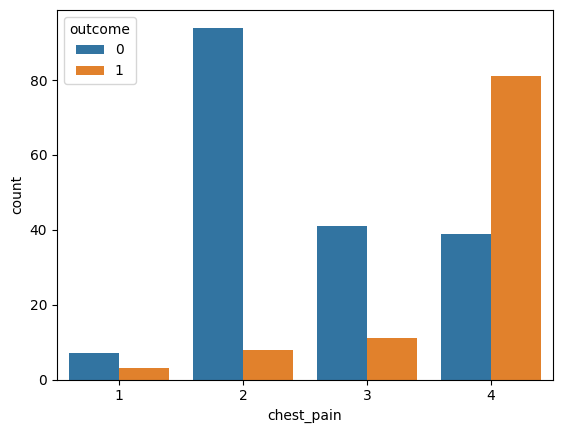

In [39]:
# visualize chest pain types by outcome
sns.countplot(x="chest_pain", hue="outcome", data=df)

<Axes: >

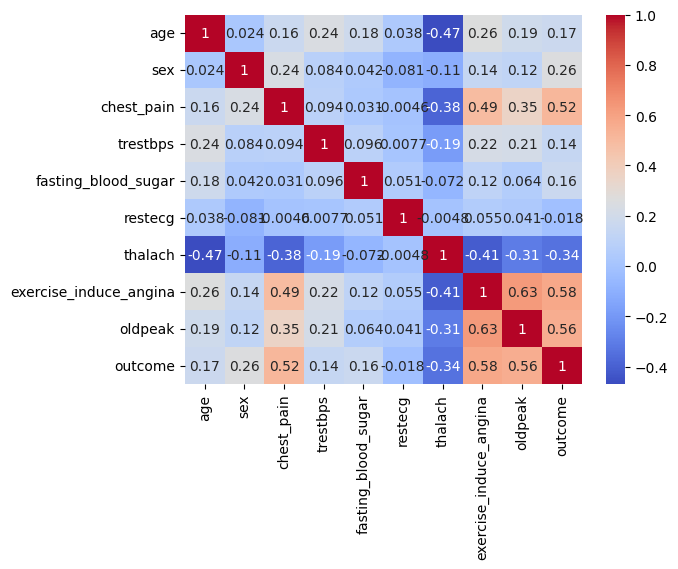

In [40]:
# correlation heatmap
sns.heatmap(df.corr(method='pearson'), annot=True, cmap="coolwarm")

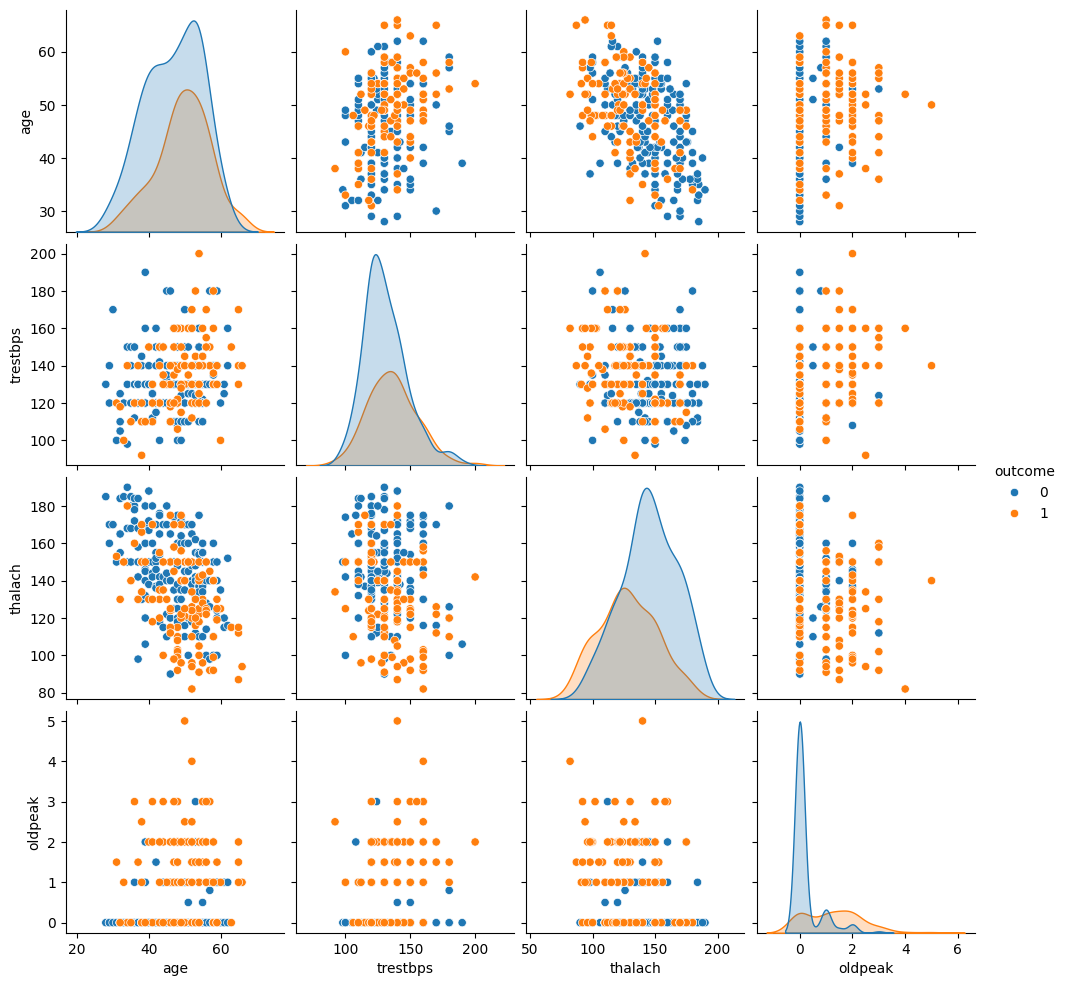

In [41]:
# pairplot of selected features colored by outcome
sns.pairplot(df[["age","trestbps","thalach","oldpeak","outcome"]], hue="outcome")

In [42]:
# separate input from output variables
x = df.drop(columns=['outcome'])
y = df['outcome']

In [43]:
# split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state = 1)

In [44]:
# create decision tree model, fit it and predict test set
model = DecisionTreeClassifier(random_state = 1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('Predicted results: ', y_pred.tolist())

Predicted results:  [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]


In [45]:
# evaluate model using accuracy metric
acc_score = accuracy_score(y_test, y_pred)
print("Overall accuracy: ", acc_score)

Overall accuracy:  0.7719298245614035


In [46]:
# perform cross validation
cross_val = cross_val_score(model, x, y, cv=10, scoring='accuracy')
cross_val_mean = cross_val.mean()
print("Cross validation accuracy score (mean): ", cross_val_mean)

Cross validation accuracy score (mean):  0.6763546798029557


In [47]:
# calculate training and testing accuracies with different minimum sample leaf values
min_samples_leaf_values = [1, 3, 5, 10, 25, 50, 100]
train_accuracies = []
test_accuracies = []

for leaf in min_samples_leaf_values:
    model = DecisionTreeClassifier(min_samples_leaf=leaf, random_state = 1)
    model.fit(x_train, y_train)
    
    train_acc = accuracy_score(y_train, model.predict(x_train))
    test_acc = accuracy_score(y_test, model.predict(x_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

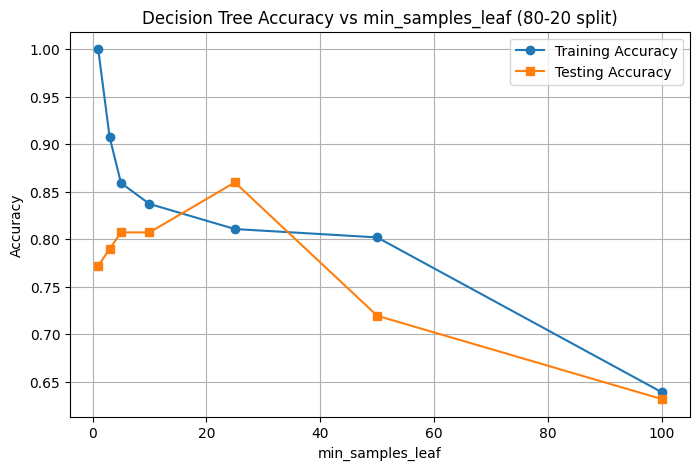

In [48]:
# plot the accuracies
plt.figure(figsize=(8, 5))
plt.plot(min_samples_leaf_values, train_accuracies, marker='o', label="Training Accuracy")
plt.plot(min_samples_leaf_values, test_accuracies, marker='s', label="Testing Accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs min_samples_leaf (80-20 split)")
plt.legend()
plt.grid(True)
plt.show()

2.

# Analysis

Let's analyse the obtained graph:

### Min samples leaf [0, 5]:
    The graph shows very high training accuracy, and low testing accuracy. This indicates model overfitting, as the model is too adapted to training data. Therefore the generalization capacity is weak at this interval.

### Min samples leaf [5, 25]:
    In this section, as the tree becomes less complex, the training accuracy decreases and testing accuracy increases sightly. Moreover, the testing accuracy peaks at around leaf=25, where it surpasses training accuracy, indicating a strong bias–variance tradeoff: the model captures relevant data, while filtering out noise. This highlights that the generalization capacity of the model is best around this value.

### Min samples leaf [25, 100]:
    With high leaf values, both training and testing accuracies decrease greatly, which demonstrates an underfitting of the model, as well as a poor generalization capacity. This happens because, as the tree becomes less complex and the model becomes more constrained, underlying edge cases may not be accounted for.

A large gap between testing and training accuracies indicates overfitting (small leaf values), and a small gap indicates underfitting (greater leaf values). Both imply poor generalization for these leaf values.

# Conclusion

As discussed in the analysis, the decision tree does not generalize well in low leaf values (1-5) because it memorizes the training data and does not perform well for testing. The testing accuracy peaks at around leaf=25, which indicates a maximization of the generalization capacity. For greater leaf values, the model does not perform well and displays underfitting tendencies.

### 3) i.

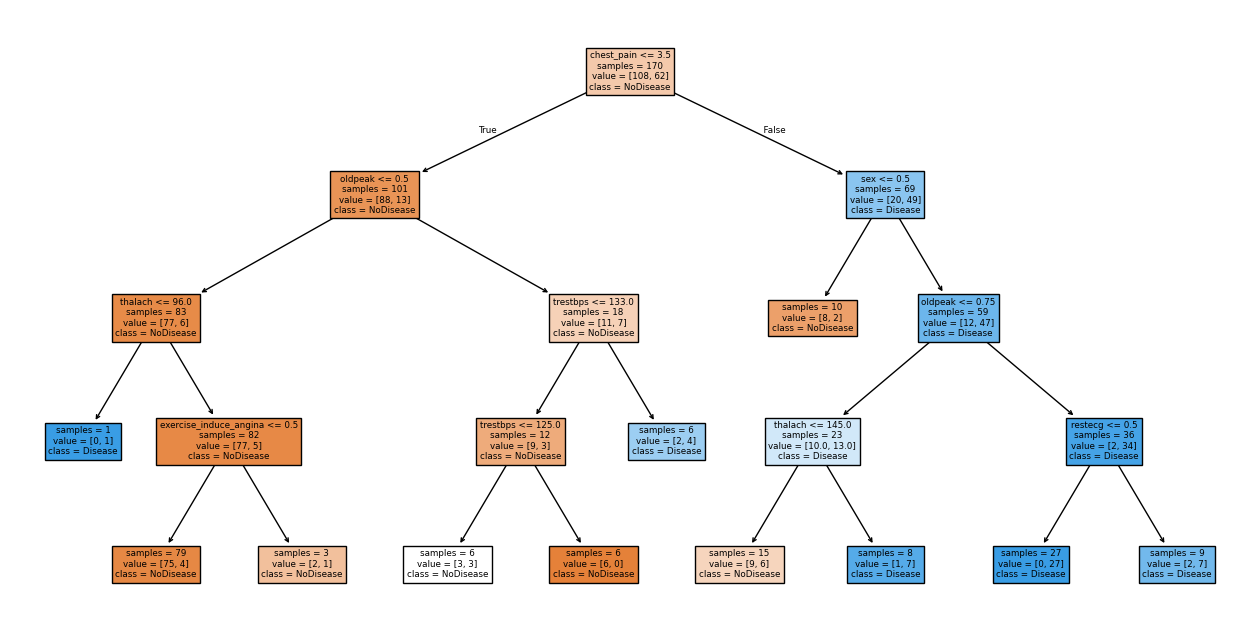

In [50]:
# Split the dataset as required (60-20-20)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, stratify=y, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=1)

# Hyperparameter search
best_model = None
best_validation_acc = 0

for depth in range(2, 5):
    for split in range(2, 101):
        model = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, random_state=1)
        model.fit(x_train, y_train)

        validation_acc = accuracy_score(y_val, model.predict(x_val))
        test_acc = accuracy_score(y_test, model.predict(x_test))

        if validation_acc >= 0.80 and test_acc >= 0.785:
            if validation_acc > best_validation_acc:
                best_validation_acc = validation_acc
                best_model = model

# i. Plot the decision tree
plt.figure(figsize=(16, 8))
plot_tree(best_model, feature_names=x.columns, class_names=["NoDisease", "Disease"], filled=True, impurity=False)
plt.show()

### ii. What caracteristics influence whether a patient has heart disease or not?

Let's look at the leaves from left to right and analyze branches from bottom to top:

### Leaf 1: 
- Conditions: thalach <= 96.0, oldpeak <= 0.5, chest_pain <= 3.5
- Samples = 1 (0 NoDisease, 1 Disease)
- Prediction: Disease
- Posterior probability: P(Disease | Conditions) = Disease/Samples = 1/1 = 1

### Leaf 2: 
- Conditions: exercise_induce_angina <= 0.5, thalach > 96.0, oldpeak <= 0.5, chest_pain <= 3.5
- Samples = 79 (75 NoDisease, 4 Disease)
- Prediction: NoDisease
- Posterior probability: P(Disease | Conditions) = 4/79

### Leaf 3: 
- Conditions: exercise_induce_angina > 0.5, thalach > 96.0, oldpeak <= 0.5, chest_pain <= 3.5
- Samples = 3 (2 NoDisease, 1 Disease)
- Prediction: NoDisease
- Posterior probability: P(Disease | Conditions) = 1/3

### Leaf 4:
- Conditions: trestbps <= 125.0, trestbps <= 133.0, oldpeak > 0.5, chest_pain <= 3.5
- Samples = 6 (3 NoDisease, 3 Disease)
- Prediction: NoDisease
- Posterior probability: P(Disease | Conditions) = 3/6 = 1/2

### Leaf 5:
- Conditions: 125.0 < trestbps <= 133.0, oldpeak > 0.5, chest_pain <= 3.5
- Samples = 6 (6 NoDisease, 0 Disease)
- Prediction: NoDisease
- Posterior probability: P(Disease | Conditions) = 0/6 = 0

### Leaf 6:
- Conditions: trestbps > 133.0, oldpeak > 0.5, chest_pain <= 3.5
- Samples = 6 (2 NoDisease, 4 Disease)
- Prediction: Disease
- Posterior probability: P(Disease | Conditions) = 4/6 = 2/3

### Leaf 7:
- Conditions: sex <= 0.5 (female), chest_pain > 3.5
- Samples = 10 (8 NoDisease, 2 Disease)
- Prediction: NoDisease
- Posterior probability: P(Disease | Conditions) = 2/10 = 1/5

### Leaf 8:
- Conditions: thalach <= 145.0, oldpeak <= 0.75, sex > 0.5, chest_pain > 3.5
- Samples = 15 (9 NoDisease, 6 Disease)
- Prediction: NoDisease
- Posterior probability: P(Disease | Conditions) = 6/15 = 2/5

### Leaf 9:
- Conditions: thalach > 145.0, oldpeak <= 0.75, sex > 0.5, chest_pain > 3.5
- Samples = 8 (1 NoDisease, 7 Disease)
- Prediction: Disease
- Posterior probability: P(Disease | Conditions) = 7/8

### Leaf 10:
- Conditions: restecg <= 0.5, oldpeak > 0.75, sex > 0.5, chest_pain > 3.5
- Samples = 27 (0 NoDisease, 27 Disease)
- Prediction: Disease
- Posterior probability: P(Disease | Conditions) = 27/27 = 1

### Leaf 11:
- Conditions: restecg > 0.5, oldpeak > 0.75, sex > 0.5, chest_pain > 3.5
- Samples = 9 (2 NoDisease, 7 Disease)
- Prediction: Disease
- Posterior probability: P(Disease | Conditions) = 7/9

As shown in the analysis, individuals with ... are more prone to heart disease. Other factors, such as ... are also strong indicators of sickness.